# Heart Disease
In this document, we will apply the different concepts and technologies learned to work on clasifying heart diseases

The data is coming from the UC Irvine website, and contains approximately 14 features and 1 target

## Framing the problem

### Defining the objective in business terms
Our main objective is to create a Machine learning model that can classify whether a patient has a heart disease based on many features containing info about his life style going from his heart rate to his smoking habits

Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)  cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic  
      4. #10 (trestbps) resting blood pressure (in mm Hg on admission to the hospital)  
      5. #12 (chol)      
      6. #16 (fbs) (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)    
      7. #19 (restecg)   resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
      8. #32 (thalach)    maximum heart rate achieved  
      9. #38 (exang)      exercise induced angina (1 = yes; 0 = no)  
      10. #40 (oldpeak)    ST depression induced by exercise relative to rest  
      11. #41 (slope)     the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping  
      12. #44 (ca)        number of major vessels (0-3) colored by flourosopy  
      13. #51 (thal)       thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
      14. #58 (num)       (the predicted attribute)



### How will our soluton be used ?
Our solution will be used in a desktop or web application in hospitals that the doctors are gonna use to help them see the probability of the patient having a heart disease  

We're going to create an API that can be used to introduce the patient info into It, to be able to make predictions on whether the patient has a disease or not  

The API will be made using FastAPI to create endpoints
## 

## How we would frame the problem ?
This problem can be framed as being a classification supervised learning offline problem, as our goal is to be able to classify the patients on a pre-established database that has labels on the data

## How should the performance be measured ?
As this is a classification problem, we will go for creating a confusion matrix, and calculate the precision and recall on them, to ensure that model gives reasonable answers, and to see how can we improve on some instances of the target

## Is the performance measure aligned with the business objective?

The performance measure is indeed aligned with the business objective, as we can get getting false positives, than having false negatives, as It can lead to the patient's death

## What would be the minimum performance needed to reach the business objective
The minimum performance would be to have as much precision for true positives, and as lowest rate of false negatives, We would opt for 95% 

## Is human expertise available
Yes, the measurements should be done by a professional to get as closest precision as possible and for the measurements to not be noisy or mis-conducted

## Get the data

We can automatically download the data from the uci using their API using the code below with the id of the repo

In [200]:
import pandas as pd
import numpy as np

In [201]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

Now, we can go and see some information about the data including the first 5 rows of the data, description and info about It

In [202]:
heart_disease.data

{'ids': None,
 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   1       145   233    1        2      150      0      2.3   
 1     67    1   4       160   286    0        2      108      1      1.5   
 2     67    1   4       120   229    0        2      129      1      2.6   
 3     37    1   3       130   250    0        0      187      0      3.5   
 4     41    0   2       130   204    0        2      172      0      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   45    1   1       110   264    0        0      132      0      1.2   
 299   68    1   4       144   193    1        0      141      0      3.4   
 300   57    1   4       130   131    0        0      115      1      1.2   
 301   57    0   2       130   236    0        2      174      0      0.0   
 302   38    1   3       138   175    0        0      173      0      0.0   
 
      slope   ca  thal  
 0        3  0.0   6.0 

In [203]:
# Copy the data into a df
df = heart_disease.data.original.copy()
columns_names = heart_disease.data.headers.tolist()

column_target = columns_names.pop(-1)
columns_features = columns_names.copy()

In [204]:
print(f"These are the feature columns {columns_features}")
print(f"This is the target column {column_target}")

These are the feature columns ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
This is the target column num


Now, we will go and study each attribute of the data

In [205]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [206]:
# Getting numerical statistics of our data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [207]:
# Getting info about the columns and their data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


We can see that the data contain 303 entries with 14 columns, 13 of which are features and one target with some missing values in the ca and thal

Now, we will go and plot the hist plot to see the distribution of the data

In [208]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

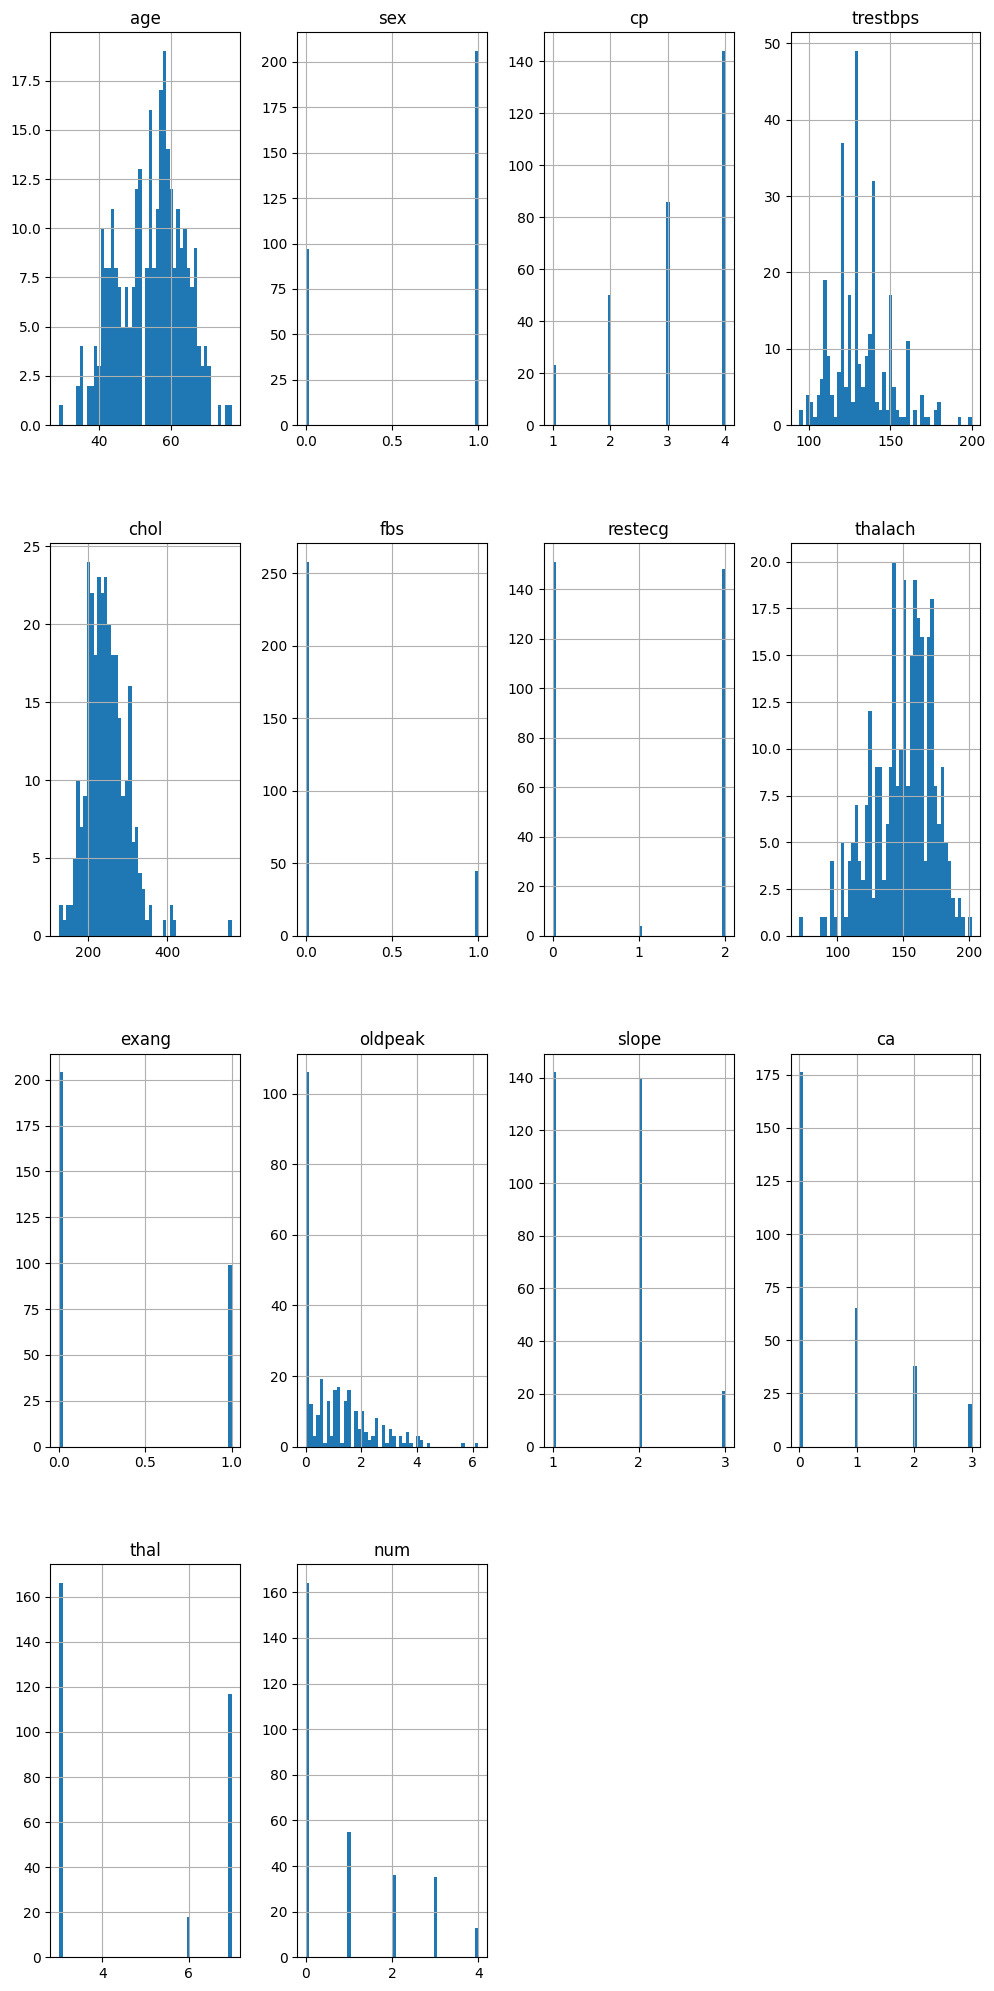

In [209]:
df.hist(bins=50,figsize=(12,25))

We can see that most of the features has a normal distribution with a bell-like shape around the mean for each numerical data, except for the categorical data

For the target column called "num", It represents diagnosis of heart disease (angiographic disease status)  
        -- Value 0: < 50% diameter narrowing  
        -- Value 1: > 50% diameter narrowing

In [210]:
df[column_target].astype("category").value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]>

## Preparing the data

### Cleaning the data
We will clean the data by removing values, outliers and all

In [211]:
df_copy = df.copy()

In [212]:
# We will go and fix the missing values, removing them is the best options as the missing values are in categorical features and not numerical
df_copy = df_copy.dropna(axis=0)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [213]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['age','trestbps','chol','thalach','oldpeak']

df_copy_numerical = df_copy[numerical_columns]


min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(df_copy_numerical)

In [214]:
df_scaled = pd.DataFrame(data_scaled,columns=numerical_columns)
df_scaled

,age,trestbps,chol,thalach,oldpeak
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.791667,0.622642,0.365297,0.282443,0.241935
2,0.791667,0.245283,0.235160,0.442748,0.419355
3,0.166667,0.339623,0.283105,0.885496,0.564516
4,0.250000,0.339623,0.178082,0.770992,0.225806
...,...,...,...,...,...
292,0.583333,0.433962,0.262557,0.396947,0.032258
293,0.333333,0.150943,0.315068,0.465649,0.193548
294,0.812500,0.471698,0.152968,0.534351,0.548387
295,0.583333,0.339623,0.011416,0.335878,0.193548


Now, we're going to delete the old columns , and add the new one

In [215]:
df_copy = df_copy.drop(columns=numerical_columns)

In [216]:
df_copy_scaled = pd.concat([df_copy, df_scaled], axis=1)

In [217]:
df_copy_scaled = df_copy_scaled.dropna(axis=0)

In [218]:
df_copy_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       292 non-null    float64
 1   cp        292 non-null    float64
 2   fbs       292 non-null    float64
 3   restecg   292 non-null    float64
 4   exang     292 non-null    float64
 5   slope     292 non-null    float64
 6   ca        292 non-null    float64
 7   thal      292 non-null    float64
 8   num       292 non-null    float64
 9   age       292 non-null    float64
 10  trestbps  292 non-null    float64
 11  chol      292 non-null    float64
 12  thalach   292 non-null    float64
 13  oldpeak   292 non-null    float64
dtypes: float64(14)
memory usage: 34.2 KB


In [219]:
df_copy_scaled

,sex,cp,fbs,restecg,exang,slope,ca,thal,num,age,trestbps,chol,thalach,oldpeak
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0,2.0,0.791667,0.622642,0.365297,0.282443,0.241935
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0,1.0,0.791667,0.245283,0.235160,0.442748,0.419355
3,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1.0,4.0,0.0,0.0,1.0,3.0,0.0,6.0,2.0,0.583333,0.433962,0.262557,0.396947,0.032258
293,1.0,4.0,0.0,2.0,1.0,1.0,2.0,7.0,2.0,0.333333,0.150943,0.315068,0.465649,0.193548
294,0.0,4.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,0.812500,0.471698,0.152968,0.534351,0.548387
295,1.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.583333,0.339623,0.011416,0.335878,0.193548


## Testing models and picking a dirty model

In this part, we will try and test some models to see the accuracy and performance of each one before going fine tuning the model

### Creating training and test dataset

In [220]:
from sklearn.model_selection import train_test_split

X = df_copy_scaled[columns_features]
y = df_copy_scaled[column_target]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

## Testing some random models
As we're dealing with a classification problem, we will go with one of the known models ( Logistic Regression, KNN, SVM, Decision Tree, RandomForest, GBM, AdaBoost, XGBoost )

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lg_reg = LogisticRegression()
knn_clf = KNeighborsClassifier()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

models = [lg_reg,knn_clf,svm_clf,dt_clf,rf_clf]


### Creating a stratified dataset for better training

In [222]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Assuming models is a list of initialized models
skfolds = StratifiedKFold(n_splits=3)  # Specify the number of folds



# Perform stratified k-fold cross-validation
for train_index, test_index in skfolds.split(X_train, y_train):

    X_train_folds = X_train.iloc[train_index]  
    X_test_folds = X_train.iloc[test_index]  
    y_train_folds = y_train.iloc[train_index] 
    y_test_folds = y_train.iloc[test_index]     

    for model in models:
        model = clone(model)  # Clone the model to avoid fitting on previous folds
        
        model.fit(X_train_folds, y_train_folds)  # Train the model
        
        y_hat = model.predict(X_test_folds)  # Predict on the test fold
        
        n_correct = sum(y_hat == y_test_folds.values)  # Compare predictions with the actual test set
        
        precision = n_correct / len(y_test_folds)  # Calculate precision (accuracy for this fold)
        
        print(f"For the model {model.__class__.__name__}, we got a precision of {precision:.2f}")


For the model LogisticRegression, we got a precision of 0.60
For the model KNeighborsClassifier, we got a precision of 0.60
For the model SVC, we got a precision of 0.62
For the model DecisionTreeClassifier, we got a precision of 0.56
For the model RandomForestClassifier, we got a precision of 0.64
For the model LogisticRegression, we got a precision of 0.63
For the model KNeighborsClassifier, we got a precision of 0.64
For the model SVC, we got a precision of 0.59
For the model DecisionTreeClassifier, we got a precision of 0.51
For the model RandomForestClassifier, we got a precision of 0.63
For the model LogisticRegression, we got a precision of 0.60
For the model KNeighborsClassifier, we got a precision of 0.52
For the model SVC, we got a precision of 0.58
For the model DecisionTreeClassifier, we got a precision of 0.44
For the model RandomForestClassifier, we got a precision of 0.51


Now, we're going to use Cross Val Evaluation to create the confusion matrix, and check the respone of each model

In [223]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


In [324]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

model_scores = []
for model in models:
    
    y_train_pred = cross_val_predict(model,X_train,y_train,cv=3)
    print(f"For the model {model} :  {confusion_matrix(y_train,y_train_pred)}")
    
    precisionScore,recallScore,f1Score = calculate_scores(y_train_pred,y_train)
    
    model_scores.append({'model':model.__class__.__name__,'score':recallScore})
    


For the model LogisticRegression() :  [[115   8   1   3   0]
 [ 21  13   8   1   0]
 [  7   6  11   5   0]
 [  5   5  12   3   0]
 [  2   2   1   4   0]]
The precision score is 0.6890261064390364

The recall score is 0.6094420600858369

The f1score score is 0.6441218745776925

For the model KNeighborsClassifier() :  [[115   7   3   2   0]
 [ 23  10   5   4   1]
 [  9  10   3   7   0]
 [  3   7   5   9   1]
 [  1   2   2   4   0]]
The precision score is 0.6709289504435193

The recall score is 0.5879828326180258

The f1score score is 0.6245335816877707

For the model SVC() :  [[119   8   0   0   0]
 [ 23  20   0   0   0]
 [  8  21   0   0   0]
 [  8  17   0   0   0]
 [  2   7   0   0   0]]
The precision score is 0.7891620095047754

The recall score is 0.5965665236051502

The f1score score is 0.6774907322848573

For the model DecisionTreeClassifier() :  [[93 23  8  2  1]
 [21  6  8  6  2]
 [ 8  8  6  5  2]
 [ 6  7  5  5  2]
 [ 1  3  2  1  2]]
The precision score is 0.4842176243090883

The

We can see that there is a sampling error, as the class 4 is not well represented, and is rarely predicted, so that would make our model biased towards the oversampled classes  
----
A way to fix this is to do some data augmentation

Now, we're going to go and calculate the scores for the confusion matrix

In [245]:
from sklearn.metrics import f1_score,precision_score,recall_score

def calculate_scores(y_pred,y):
    
    precisionScore = precision_score(y_pred,y,average='weighted')
    recallScore = recall_score(y_pred,y,average='weighted')
    f1Score = f1_score(y_pred,y,average='weighted')
    print(f"The precision score is {precisionScore}\n")
    print(f"The recall score is {recallScore}\n")
    print(f"The f1score score is {f1Score}\n")
    
    return precisionScore,recallScore,f1Score

In [326]:
print(max(model_scores,key=lambda x:x['score']))

{'model': 'LogisticRegression', 'score': np.float64(0.6094420600858369)}


Now, we can see the model with the highest accuracy is the Support Vector Machine with a precision of 67% without any fine-tuning parameters

Now, we'll use the grid search to get the best parameters combination for the Support Vector Machines

In [337]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = [
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],  # 'l2' can be used with both 'liblinear' and 'lbfgs'
        'solver': ['liblinear', 'lbfgs']  # Both solvers support 'l2'
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],  # 'l1' can only be used with 'liblinear' or 'saga'
        'solver': ['liblinear']  # Only 'liblinear' supports 'l1'
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['elasticnet'],  # 'elasticnet' can only be used with 'saga'
        'solver': ['saga'],  # Only 'saga' supports 'elasticnet'
        'l1_ratio': [0.1, 0.5, 0.9]  # Include l1_ratio for elasticnet
    }
]

# Create an instance of the Logistic Regression model
logistic_clf_final = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Set up GridSearchCV with recall_weighted as the scoring metric
grid_search = GridSearchCV(logistic_clf_final, param_grid, cv=3, scoring='recall_weighted', error_score='raise')

# Fit the model to your training data
# grid_search.fit(X_train, y_train)

# You can now access the best parameters found by GridSearch
# best_params = grid_search.best_params_


In [338]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                          'solver': ['liblinear', 'lbfgs']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.5, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='recall_weighted')

In [339]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [340]:
import joblib

final_model = grid_search.best_estimator_
joblib.dump(final_model,"svm_heart_classifier.pkl")

y_hat = final_model.predict(X_test)

confusion_matrix(y_hat,y_test)

calculate_scores(y_hat,y_test)

The precision score is 0.7131655538435199

The recall score is 0.6101694915254238

The f1score score is 0.651964899120692



(np.float64(0.7131655538435199),
 np.float64(0.6101694915254238),
 np.float64(0.651964899120692))

## Conclusion
The SVM model gives us an accuracy of 71% which means that among all of the positives that the model predicted, 71% were truly positive  
for the recall, out of the true positives and the false negatives, it was right 64% of the times.
A way to improve the model would be to add more data on the missing values as It is oversampled on some classes, and less sampled on others

But, overall, we would train our model to improve on Its recall